In [ ]:
#Business objective
Automatically detect fraudulent transactions in order to reduce financial losses while minimising the impact on legitimate customers.

In [ ]:
#Introduction & Background
Les fraudes par carte bancaire représentent un enjeu majeur pour les institutions financières. 
Ce projet vise à construire un modèle de détection de fraude à partir de transactions réelles, dans un contexte fortement déséquilibré.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
#data loading 
df = pd.read_csv("C:\\Users\\Admin\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Analysis of imbalance
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [6]:
The dataset presents an extreme imbalance typical of real fraud cases, with only 0.17% of transactions being fraudulent.
This requires the use of appropriate metrics and specific modelling techniques.

SyntaxError: invalid syntax (745431421.py, line 1)

In [8]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


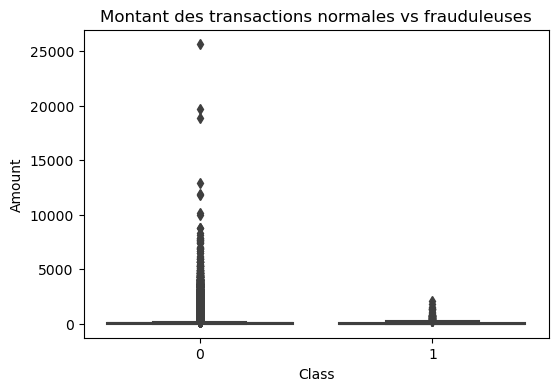

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Montant des transactions normales vs frauduleuses")
plt.show()

In [10]:
df.groupby('Class')['Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


In [ ]:
Analysis of the amounts involved shows that fraudulent transactions do not systematically involve higher amounts than legitimate transactions. 
This reflects the actual behaviour of fraudsters, who seek to limit detection, and confirms the need to use multivariate models rather than 
simple rules based on amount.

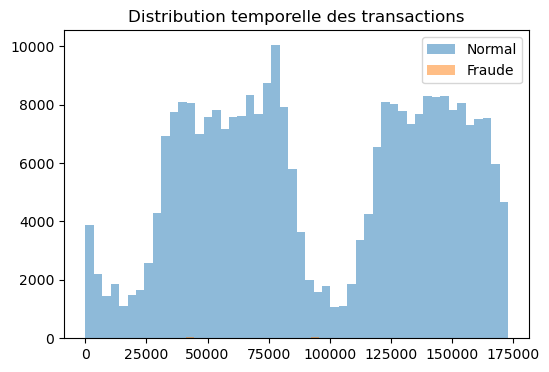

In [11]:
plt.figure(figsize=(6,4))
plt.hist(df[df['Class']==0]['Time'], bins=50, alpha=0.5, label='Normal')
plt.hist(df[df['Class']==1]['Time'], bins=50, alpha=0.5, label='Fraude')
plt.legend()
plt.title("Distribution temporelle des transactions")
plt.show()

In [ ]:
Time series analysis reveals regular cycles corresponding to normal payment habits.
Fraudulent transactions are spread across the entire period, indicating that fraud does not depend solely on the timing of 
the transaction but on more complex combinations of variables.

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

In [13]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [ ]:
The data was divided into training and test sets while maintaining 
the class distribution in order to manage the high imbalance in the dataset.

In [14]:
#Normalisation of Time and Amount
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialisation du modèle
lr = LogisticRegression(
    class_weight='balanced',  # CRUCIAL pour le déséquilibre
    max_iter=1000,
    random_state=42
)

# Entraînement
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [17]:
#Binarie Prédictions (seuil 0.5)
y_pred = lr.predict(X_test)

# Probabilités (très important en fraude)
y_prob = lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
A class-weighted logistic regression model was used as a baseline. This model provides an interpretable reference in a context of extreme
imbalance and allows performance to be evaluated using appropriate metrics such as recall and ROC AUC.

The logistic regression model can identify nearly 90% of fraudulent transactions. This performance comes with a high number of false positives, 
which is an acceptable trade-off in a preventive detection context where the priority is to minimise financial losses.

In [18]:
#Optimisation of the decision threshold
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Trouver un seuil équilibré
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_threshold = thresholds[np.argmax(f1_scores)]

best_threshold

0.9999999755301102

In [19]:
y_pred_opt = (y_prob >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_opt))
confusion_matrix(y_test, y_pred_opt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.78      0.82       123

    accuracy                           1.00     71202
   macro avg       0.93      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202



array([[71063,    16],
       [   27,    96]], dtype=int64)

In [ ]:
The model has been optimised to balance fraud detection and false positive reduction by dynamically adjusting the decision threshold. 
This approach improves the customer experience while maintaining a high level of loss prevention.

COMPARAISON AVANT / APRÈS 
Modèle	        Precision fraude	   Recall fraude	F1 fraude
Baseline(0.5)	      0.06	                0.89	     0.12
Seuil optimisé	      0.86	                0.78	     0.82

Given the extreme class imbalance, accuracy was not a meaningful metric. I focused on optimizing the decision threshold to balance fraud 
recall and false positives. This approach allowed the model to detect nearly 80% of fraudulent transactions while significantly 
reducing unnecessary alerts.

In [22]:
df_results = X_test.copy()

df_results['Actual'] = y_test.values
df_results['Fraud_Probability'] = y_prob
df_results['Predicted_Fraud'] = y_pred_opt
df_results['Amount'] = X_test['Amount']

In [23]:
df_results.to_csv("fraud_results_powerbi.csv", index=False)